# Goods Supply Chain

# Load Libraries

In [5]:
import numpy as np # package for numerical computations
import pandas as pd # package for data analysis

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder # for converting categorical to numerical
from sklearn.model_selection import train_test_split  # To split the dataset into train and test set
from sklearn.ensemble import RandomForestClassifier  # RandomForest Classifier Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # for model evaluation

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [6]:
df = pd.read_csv('supply_chain.csv')

In [7]:
# Take a look at the first five observations
df.head()

,supplier_id,sector,handle_with_care,Price,deliver_within,goods_season,plan,exceed_date,delivery
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector,Yes,1250000,7,0,No,No,0
2,34,Private Sector,Yes,500000,4,1,No,No,1
3,28,Private Sector,Yes,700000,3,1,No,No,0
4,28,Private Sector,Yes,700000,8,1,Yes,No,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   supplier_id       1987 non-null   int64 
 1   sector            1987 non-null   object
 2   handle_with_care  1987 non-null   object
 3   Price             1987 non-null   int64 
 4   deliver_within    1987 non-null   int64 
 5   goods_season      1987 non-null   int64 
 6   plan              1987 non-null   object
 7   exceed_date       1987 non-null   object
 8   delivery          1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


* We have 1987 rows and 9 columns
* Non-null values for all the columns are 1987. 
* Columns such as supplier_id, Price, deliver_within, goods_season, delivery have Integer as a datatype 
* Columns such as sector, handle_with_care, plan, exceed_date have object as a datatype

In [47]:
# checking for dataset shape
df.shape

(1987, 9)

we have, 1987 rows and 9 columns

# Checking for Null values

In [9]:
df.isna().sum()

supplier_id         0
sector              0
handle_with_care    0
Price               0
deliver_within      0
goods_season        0
plan                0
exceed_date         0
delivery            0
dtype: int64

There are no null values in our data

In [10]:
# Tells us about the count of values present in column 
df['delivery'].value_counts()

0    1277
1     710
Name: delivery, dtype: int64

<AxesSubplot:xlabel='delivery', ylabel='count'>

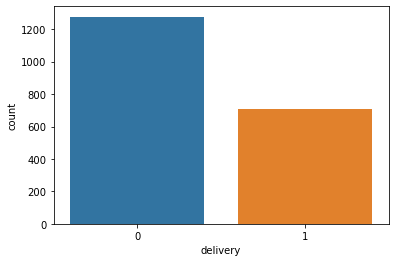

In [48]:
sns.countplot(data=df, x='delivery')

We have 1277 values belongs to class 0 and 710 values has class 1

## Encoding

In [11]:
# dividing the data into categorical and Numerical
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(["int64", "float64"])

In [12]:
# categorical data
df_cat.head()

,sector,handle_with_care,plan,exceed_date
0,Government Sector,Yes,No,No
1,Private Sector,Yes,No,No
2,Private Sector,Yes,No,No
3,Private Sector,Yes,No,No
4,Private Sector,Yes,Yes,No


In [13]:
# numerical data
df_num.head()

,supplier_id,Price,deliver_within,goods_season,delivery
0,31,400000,6,1,0
1,31,1250000,7,0,0
2,34,500000,4,1,1
3,28,700000,3,1,0
4,28,700000,8,1,0


In [14]:
# Converting the categorical data into numerical data
for col in df_cat:
    le= LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [15]:
# Numerical converted data
df_cat.head()

,sector,handle_with_care,plan,exceed_date
0,0,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,1,0


In [16]:
# concatinating both the data
df= pd.concat([df_cat, df_num], axis=1)

In [17]:
df.head()

,sector,handle_with_care,plan,exceed_date,supplier_id,Price,deliver_within,goods_season,delivery
0,0,1,0,0,31,400000,6,1,0
1,1,1,0,0,31,1250000,7,0,0
2,1,1,0,0,34,500000,4,1,1
3,1,1,0,0,28,700000,3,1,0
4,1,1,1,0,28,700000,8,1,0


# Prepare Train/Test Data

Separating the input and output variables

Before building any machine learning model, we always separate the input variables and output variables. Input variables are those quantities whose values are changed naturally in an experiment, whereas output variable is the one whose values are dependent on the input variables. So, input variables are also known as independent variables as its values are not dependent on any other quantity, and output variable/s are also known as dependent variables as its values are dependent on other variable i.e. input variables.

By convention input variables are represented with 'x' and output variables are represented with 'y'.

In [18]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

Train/test split

We want to check the performance of the model that we built. For this purpose, we always split (both input and output data) the given data into training set which will be used to train the model, and test set which will be used to check how accurately the model is predicting outcomes.

For this purpose we have a class called 'train_test_split' in the 'sklearn.model_selection' module.

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=1, stratify=y)

To preserve the proportion of examples for each class label we use stratification splitting

# Random Forest Model

In [20]:
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
ypred_train = rf.predict(xtrain)
ypred_test = rf.predict(xtest)

# Model Evaluation

In [21]:
print('Classification report for train data \n ')
print(classification_report(ytrain,ypred_train))    
print(confusion_matrix(ytrain,ypred_train)) 
print(' ')
print('Classification report for test data \n ')
print(classification_report(ytest,ypred_test))    
print(confusion_matrix(ytest,ypred_test))

Classification report for train data 
 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       958
           1       0.95      0.83      0.89       532

    accuracy                           0.92      1490
   macro avg       0.93      0.90      0.91      1490
weighted avg       0.93      0.92      0.92      1490

[[934  24]
 [ 89 443]]
 
Classification report for test data 
 
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       319
           1       0.74      0.65      0.69       178

    accuracy                           0.79       497
   macro avg       0.78      0.76      0.77       497
weighted avg       0.79      0.79      0.79       497

[[278  41]
 [ 63 115]]


# Random Forest and Boruta

In [22]:
!pip install Boruta

In [23]:
from boruta import BorutaPy

In [24]:
rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)   # initialize the boruta selector
boruta_selector.fit(np.array(xtrain), np.array(ytrain))       # fitting the boruta selector to get all relavent features. 
# NOTE: BorutaPy accepts numpy arrays only.

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	0
Rejected: 	3


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	0
Rejected: 	3


BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=80,
                                          random_state=RandomState(MT19937) at 0x2627E120B40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x2627E120B40, verbose=2)

In [25]:
print("Selected Features: ", boruta_selector.support_)    # check selected features
 

print("Ranking: ",boruta_selector.ranking_)               # check ranking of features

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [False False  True  True  True  True  True False]
Ranking:  [2 3 1 1 1 1 1 4]
No. of significant features:  5


In [30]:
#Create a new subset of the data with only the selected features
X_important_train = boruta_selector.transform(np.array(xtrain))
X_important_test = boruta_selector.transform(np.array(xtest))

In [32]:
# Create a new random forest classifier for the most important features
rf = RandomForestClassifier()

# Train the new classifier on the new dataset containing the most important features
rf.fit(X_important_train, ytrain)
ypred_train = rf.predict(X_important_train)
ypred_test = rf.predict(X_important_test)

# Model Evaluation

In [33]:
print('Classification report for train data \n ')
print(classification_report(ytrain,ypred_train))    
print(confusion_matrix(ytrain,ypred_train)) 
print(' ')
print('Classification report for test data \n ')
print(classification_report(ytest,ypred_test))    
print(confusion_matrix(ytest,ypred_test))

Classification report for train data 
 
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       958
           1       0.91      0.79      0.85       532

    accuracy                           0.90      1490
   macro avg       0.90      0.87      0.89      1490
weighted avg       0.90      0.90      0.90      1490

[[918  40]
 [111 421]]
 
Classification report for test data 
 
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       319
           1       0.77      0.65      0.70       178

    accuracy                           0.80       497
   macro avg       0.80      0.77      0.78       497
weighted avg       0.80      0.80      0.80       497

[[285  34]
 [ 63 115]]


# Hyperparameter Tunning

In [34]:
rff = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=7, random_state=101)
rff.fit(X_important_train, ytrain)
ypred_train = rff.predict(X_important_train)
ypred_test = rff.predict(X_important_test)

In [35]:
print('Classification report for train data \n ')
print(classification_report(ytrain,ypred_train))    
print(confusion_matrix(ytrain,ypred_train)) 
print(' ')
print('Classification report for test data \n ')
print(classification_report(ytest,ypred_test))    
print(confusion_matrix(ytest,ypred_test))

Classification report for train data 
 
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       958
           1       0.90      0.60      0.72       532

    accuracy                           0.83      1490
   macro avg       0.86      0.78      0.80      1490
weighted avg       0.85      0.83      0.83      1490

[[924  34]
 [212 320]]
 
Classification report for test data 
 
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       319
           1       0.88      0.62      0.73       178

    accuracy                           0.84       497
   macro avg       0.85      0.79      0.81       497
weighted avg       0.84      0.84      0.83       497

[[304  15]
 [ 67 111]]


## GridSearchCV

In [37]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15],
    'n_estimators': [500, 1000]}

In [38]:
rf = RandomForestClassifier(random_state = 1)

# Grid search cv
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [40]:
grid_search.fit(X_important_train, ytrain)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'n_estimators': [500, 1000]},
             verbose=2)

In [41]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 5, 'n_estimators': 500}

# Model Evaluation

In [44]:
print('Classification report for train data \n ')
print(classification_report(ytrain,ypred_train))    
print(confusion_matrix(ytrain,ypred_train)) 
print(' ')
print('Classification report for test data \n ')
print(classification_report(ytest,ypred_test))    
print(confusion_matrix(ytest,ypred_test))

Classification report for train data 
 
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       958
           1       0.90      0.60      0.72       532

    accuracy                           0.83      1490
   macro avg       0.86      0.78      0.80      1490
weighted avg       0.85      0.83      0.83      1490

[[924  34]
 [212 320]]
 
Classification report for test data 
 
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       319
           1       0.88      0.62      0.73       178

    accuracy                           0.84       497
   macro avg       0.85      0.79      0.81       497
weighted avg       0.84      0.84      0.83       497

[[304  15]
 [ 67 111]]
